IMPORTING DATA FROM DRIVE (WALLMAR SALES FOR 3 YEARS)

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


NECESSARY LIBRARIES 

In [2]:
# Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


USING PANDAS TO READ THE CSV FILE

In [3]:
# Reading the CSV file
df = pd.read_csv('/content/mydrive/MyDrive/Project/Data Mining/wallmart_group5.csv', index_col=0)

DATA EXPLORATION 

In [4]:
# Reviewing the data by using head() function, BTW I have already preprocessed the data
df.head()
df.shape


(420212, 16)

In [5]:
df.rename({'IsHoliday_x' : 'IsHoliday'}, axis = 1, inplace = True) #Change name of IsHoloday_x coloumn to IsHoliday

DESCRIPTIVE STATISTICS

In [6]:
df.info()
# No mising or na values in the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420212 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  int64  
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   MarkDown1     420212 non-null  float64
 8   MarkDown2     420212 non-null  float64
 9   MarkDown3     420212 non-null  float64
 10  MarkDown4     420212 non-null  float64
 11  MarkDown5     420212 non-null  float64
 12  CPI           420212 non-null  float64
 13  Unemployment  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
dtypes: float64(10), int64(4), object(2)
memory usage: 54.5+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,420212.0,22.195611,12.787236,1.000,11.000000,22.000000,33.000000,45.000000
Dept,420212.0,44.241309,30.508819,1.000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,420212.0,16033.114591,22729.492116,0.010,2120.130000,7661.700000,20271.265000,693099.360000
IsHoliday,420212.0,0.070345,0.255729,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,420212.0,60.090599,18.447857,-2.060,46.680000,62.090000,74.280000,100.140000
Fuel_Price,420212.0,3.360890,0.458519,2.472,2.933000,3.452000,3.738000,4.468000
MarkDown1,420212.0,2590.323565,6053.415601,0.000,0.000000,0.000000,2809.050000,88646.760000
MarkDown2,420212.0,878.905242,5076.928566,-265.760,0.000000,0.000000,2.400000,104519.540000
MarkDown3,420212.0,468.845949,5534.069859,-29.100,0.000000,0.000000,4.540000,141630.610000
MarkDown4,420212.0,1083.534361,3896.068938,0.000,0.000000,0.000000,425.290000,67474.850000


NUMBER OF UNIQUE VALUES OF STORES

In [8]:
df['Store'].nunique() # Number of unique values of Store

45

NUMBER OF UNIQUE VALUES IF DEPARTMENT 

In [9]:
df['Dept'].nunique() # Number of unique values of Department 

81

SALES VS ISHOLIDAY (BAR GRAPH)

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

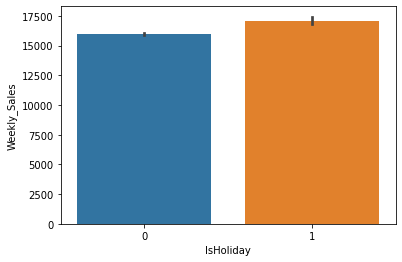

In [10]:

sns.barplot(x = df['IsHoliday'], y=df['Weekly_Sales'])

DATA TRANSFORMATION 

In [11]:
for i in df.loc[:,'MarkDown1':'MarkDown5']:
  df[i] = df[i].apply(lambda x : 1 if x > 0 else 0)



In [12]:
for col in df:
  if col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    df[col] = df[col].astype('bool')
  else:
    continue

In [13]:
df.replace({False: 0, True: 1}, inplace=True)

SALES VS Stores (Bar Graph)

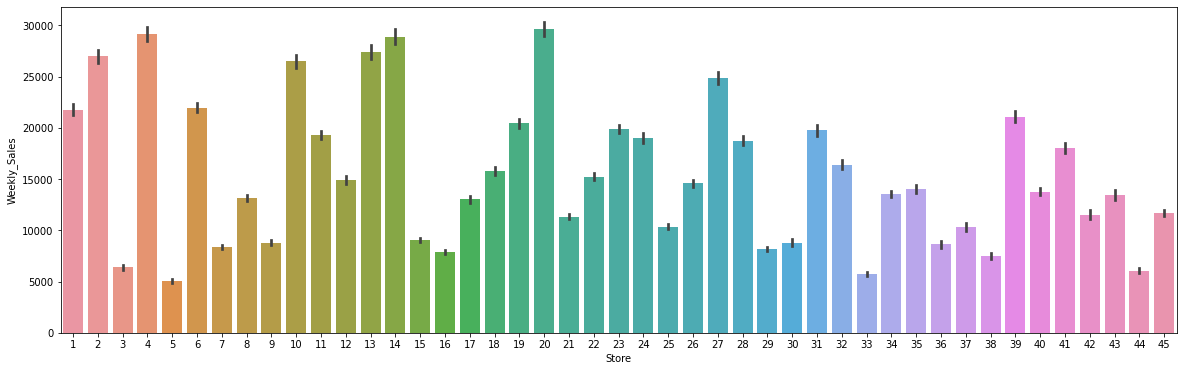

In [14]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [15]:
print('Avergae sales for 3 years is : ',df['Weekly_Sales'].mean())
print('Median Sales for 3 years is : ',df['Weekly_Sales'].median())
print('Minimum sales : ', df['Weekly_Sales'].min())
print('Maximum sales : ', df['Weekly_Sales'].max())

Avergae sales for 3 years is :  16033.11459137293
Median Sales for 3 years is :  7661.7
Minimum sales :  0.01
Maximum sales :  693099.36


SALES VS DEPARTMENT (BARGRAPH)

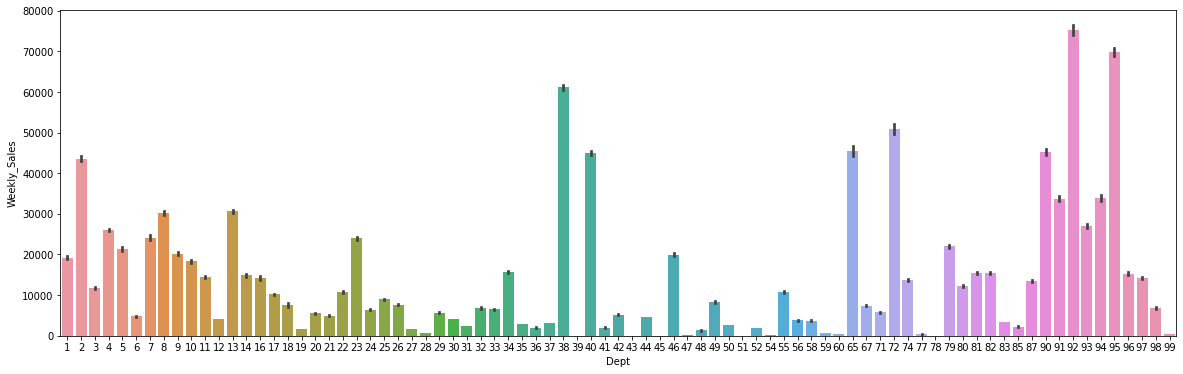

In [16]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

MARKDOWN1 VS AVERAGE WEEKLY_SALES

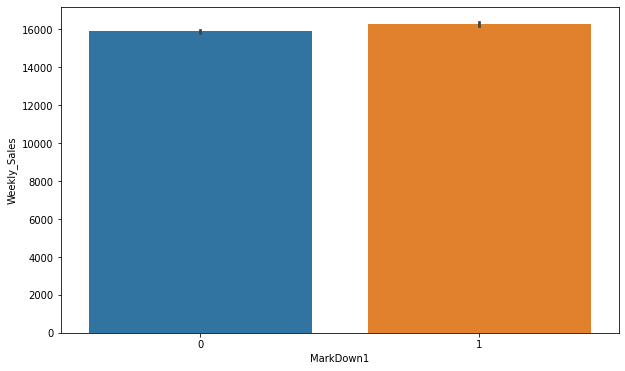

In [17]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x='MarkDown1', y='Weekly_Sales', data=df)

MARKDOWN2 VS AVERAGE WEEKLY_SALES

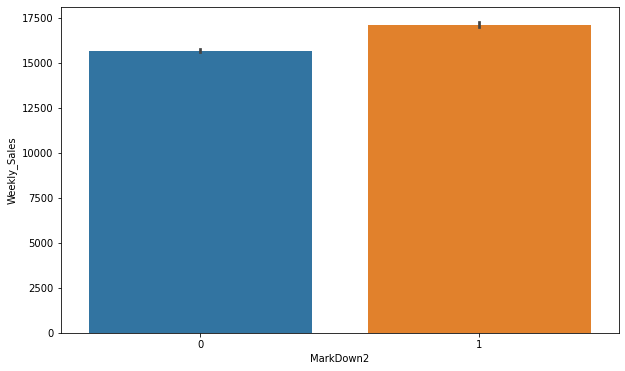

In [18]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x='MarkDown2', y='Weekly_Sales', data=df)

MARKDOWN3 VS AVERAGE WEEKLY_SALES

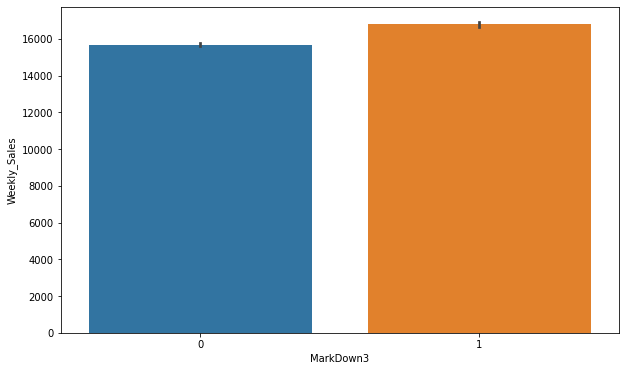

In [19]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x='MarkDown3', y='Weekly_Sales', data=df)

MARKDOWN4 VS AVERAGE WEEKLY_SALES

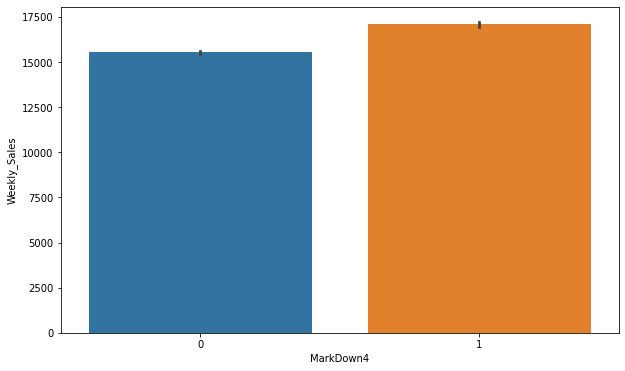

In [20]:
plt.figure(figsize=(10,6))
fig = sns.barplot(x='MarkDown4', y='Weekly_Sales', data=df)

In [21]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

<ipython-input-21-410664ccc3da>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] =df['Date'].dt.week


In [22]:
df.groupby('month')['Weekly_Sales'].mean()

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='month'>

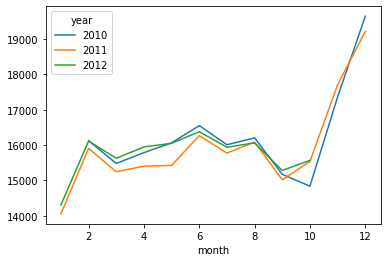

In [23]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

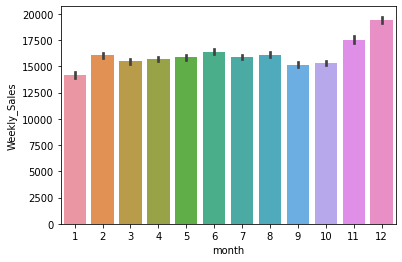

In [24]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

In [25]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4836.578944,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,517.552564
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1200.158451,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,417.101781,19340.693986,5985.671119,667.070315,31.609545,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,725.131261,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,420.477500,30.155385,NaN


In [26]:
df_holiday = df[df['IsHoliday'] == True]
df_holiday.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
73,1,1,2010-02-12,46039.49,1,38.51,2.548,0,0,0,0,0,211.24217,8.106,A,151315,6,2,2010
74,1,2,2010-02-12,44682.74,1,38.51,2.548,0,0,0,0,0,211.24217,8.106,A,151315,6,2,2010
75,1,3,2010-02-12,10887.84,1,38.51,2.548,0,0,0,0,0,211.24217,8.106,A,151315,6,2,2010
76,1,4,2010-02-12,35351.21,1,38.51,2.548,0,0,0,0,0,211.24217,8.106,A,151315,6,2,2010
77,1,5,2010-02-12,29620.81,1,38.51,2.548,0,0,0,0,0,211.24217,8.106,A,151315,6,2,2010


In [27]:
df_holiday['Date'].nunique()

10

In [28]:
df_not_holiday = df[df['IsHoliday'] == False]
df_not_holiday['Date'].nunique()

133

In [29]:
df.sort_values(by = 'Weekly_Sales', ascending = False).head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
90645,10,72,2010-11-26,693099.36,1,55.33,3.162,0,0,0,0,0,126.669267,9.003,B,126512,47,11,2010
337053,35,72,2011-11-25,649770.18,1,47.88,3.492,1,0,1,1,1,140.421786,8.745,B,103681,47,11,2011
94393,10,72,2011-11-25,630999.19,1,60.68,3.760,1,1,1,1,1,129.836400,7.874,B,126512,47,11,2011
333594,35,72,2010-11-26,627962.93,1,46.67,3.039,0,0,0,0,0,136.689571,8.763,B,103681,47,11,2010
131088,14,72,2010-11-26,474330.10,1,46.15,3.039,0,0,0,0,0,182.783277,8.724,A,200898,47,11,2010


In [30]:
df.groupby('Type').describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,214961.0,182225.39,41532.66,39690.0,158114.0,202505.0,203819.0,219622.0
B,162787.0,101796.84,30944.31,34875.0,93188.0,114533.0,123737.0,140167.0
C,42464.0,40536.10,1194.69,39690.0,39690.0,39910.0,41062.0,42988.0


In [31]:
tmp = df[(df['Dept'] == 92) & (df['Store']==14)]

In [32]:
tmp

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
128145,14,92,2010-02-05,293966.05,0,27.31,2.784,0,0,0,0,0,181.871190,8.992,A,200898,5,2,2010
128217,14,92,2010-02-12,151901.21,1,27.73,2.773,0,0,0,0,0,181.982317,8.992,A,200898,6,2,2010
128289,14,92,2010-02-19,192282.19,0,31.27,2.745,0,0,0,0,0,182.034782,8.992,A,200898,7,2,2010
128361,14,92,2010-02-26,205250.96,0,34.89,2.754,0,0,0,0,0,182.077469,8.992,A,200898,8,2,2010
128433,14,92,2010-03-05,214383.07,0,37.13,2.777,0,0,0,0,0,182.120157,8.992,A,200898,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137836,14,92,2012-09-28,139707.80,0,64.88,3.997,1,1,1,1,1,192.013558,8.684,A,200898,39,9,2012
137905,14,92,2012-10-05,169519.23,0,64.89,3.985,1,0,1,1,1,192.170412,8.667,A,200898,40,10,2012
137976,14,92,2012-10-12,156174.21,0,54.47,4.000,1,0,1,1,1,192.327265,8.667,A,200898,41,10,2012
138046,14,92,2012-10-19,152511.55,0,56.47,3.969,1,0,1,1,1,192.330854,8.667,A,200898,42,10,2012


In [33]:
tmp = df.groupby('Store')

In [34]:
tmp.describe()

Dept                                                      \
         count       mean        std  min   25%   50%    75%   max   
Store                                                                
1      10226.0  44.391844  29.889365  1.0  20.0  37.0  72.00  99.0   
2      10214.0  44.463188  30.004480  1.0  20.0  37.0  72.00  99.0   
3       9026.0  41.024706  29.198625  1.0  17.0  33.0  65.25  98.0   
4      10267.0  44.524593  29.975054  1.0  20.0  38.0  72.00  99.0   
5       8978.0  41.260080  29.092539  1.0  17.0  34.0  60.00  98.0   
6      10189.0  44.436451  30.027873  1.0  20.0  37.0  72.00  99.0   
7       9738.0  44.318751  30.206007  1.0  20.0  38.0  72.00  99.0   
8       9883.0  43.673277  29.855677  1.0  19.0  36.0  72.00  99.0   
9       8834.0  40.017206  28.582912  1.0  17.0  33.0  60.00  98.0   
10     10260.0  43.956433  29.344752  1.0  20.0  38.0  71.00  98.0   
11     10033.0  44.579687  30.243958  1.0  20.0  37.0  72.00  99.0   
12      9665.0  43.403725  29.865646  1.0  19.0  36.0  71.00  99.0   
13     10457.0  44.636990  29.686819  1.0  20.0  38.0  72.00  99.0   
14     10005.0  44.013293  29.743511  1.0  19.0  38.0  71.00  99.0   
15      9854.0  43.926730  29.990771  1.0  19.0  36.0  72.00  99.0   
16      9403.0  42.551632  29.724853  1.0  18.0  35.0  71.00  99.0   
17      9812.0  43.530065  29.596065  1.0  19.0  36.0  71.00  99.0   
18      9805.0  43.374401  29.574593  1.0  19.0  36.0  71.00  99.0   
19     10114.0  44.940874  30.029368  1.0  20.0  38.0  72.00  99.0   
20     10173.0  44.124644  29.462791  1.0  20.0  38.0  71.00  99.0   
21      9544.0  42.923931  29.631653  1.0  19.0  35.0  71.00  99.0   
22      9646.0  43.643687  29.875384  1.0  19.0  36.0  72.00  99.0   
23     10018.0  43.923438  29.711007  1.0  19.0  38.0  71.00  99.0   
24     10210.0  44.460529  30.028727  1.0  19.0  37.0  72.00  99.0   
25      9768.0  43.540336  29.501531  1.0  20.0  37.0  71.00  98.0   
26      9844.0  44.272247  30.476857  1.0  19.0  36.0  74.00  99.0   
27     10196.0  44.472146  30.058473  1.0  19.0  37.0  72.00  99.0   
28     10099.0  44.473215  30.187457  1.0  19.0  37.0  72.00  99.0   
29      9424.0  43.146859  29.913308  1.0  18.0  35.0  71.00  99.0   
30      7139.0  47.071439  34.142355  1.0  13.0  41.0  82.00  99.0   
31     10101.0  44.570439  30.268794  1.0  19.0  37.0  72.00  99.0   
32     10170.0  44.517306  30.075709  1.0  20.0  37.0  72.00  99.0   
33      6478.0  46.683236  34.674886  1.0  13.0  41.0  82.00  99.0   
34     10206.0  44.741917  29.998073  1.0  20.0  38.0  72.00  99.0   
35      9402.0  43.312061  29.771745  1.0  18.0  36.0  71.00  98.0   
36      6197.0  47.174923  35.028694  1.0  13.0  42.0  83.00  99.0   
37      7198.0  46.896777  34.089002  1.0  13.0  42.0  82.00  99.0   
38      7351.0  46.276833  33.850290  1.0  13.0  40.0  82.00  99.0   
39      9839.0  44.790629  30.424924  1.0  20.0  38.0  74.00  99.0   
40     10003.0  44.761372  30.147981  1.0  20.0  38.0  72.00  99.0   
41     10057.0  44.847469  30.167492  1.0  20.0  38.0  72.00  99.0   
42      6907.0  46.971913  34.131703  1.0  14.0  40.0  82.00  98.0   
43      6727.0  47.100937  34.493102  1.0  13.0  42.0  82.00  99.0   
44      7142.0  46.761831  34.192221  1.0  13.0  40.0  82.00  99.0   
45      9610.0  43.354318  29.963114  1.0  18.0  35.0  72.00  98.0   

      Weekly_Sales                ... month           year               \
             count          mean  ...   75%   max    count         mean   
Store                             ...                                     
1          10226.0  21749.145978  ...   9.0  12.0  10226.0  2010.963720   
2          10214.0  26961.734433  ...   9.0  12.0  10214.0  2010.966419   
3           9026.0   6380.226664  ...   9.0  12.0   9026.0  2010.965101   
4          10267.0  29175.540012  ...   9.0  12.0  10267.0  2010.964936   
5           8978.0   5065.283995  ...   9.0  12.0   8978.0  2010.966696   
6          10189.0  21960.799719  ...   9.0  12.0

In [35]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
Store,1.000000,0.024258,-0.085117,-0.000522,-0.050230,0.065321,-0.002450,-0.057849,-0.021958,-0.093510,0.001958,-0.211261,0.208759,-0.182763,0.000926,0.000907,0.002831
Dept,0.024258,1.000000,0.148749,0.000663,0.004727,0.003544,0.004687,0.001587,0.003798,-0.000639,0.004952,-0.007178,0.007787,-0.002491,0.000767,0.000800,0.003716
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,-0.002339,0.000089,0.007761,0.027985,0.023095,0.031707,0.006522,-0.021162,-0.025806,0.244117,0.027659,0.028401,-0.010015
IsHoliday,-0.000522,0.000663,0.012843,1.000000,-0.155775,-0.078155,0.025990,0.054810,0.036335,0.029308,0.025891,-0.001933,0.010555,0.000797,0.127846,0.123058,-0.056572
Temperature,-0.050230,0.004727,-0.002339,-0.155775,1.000000,0.143700,-0.013036,-0.087225,-0.035881,-0.046170,-0.011877,0.182223,0.096768,-0.058413,0.236256,0.235957,0.065712
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.143700,1.000000,0.484804,0.327270,0.449081,0.446779,0.486127,-0.164199,-0.033915,0.003632,-0.031191,-0.040931,0.779681
MarkDown1,-0.002450,0.004687,0.007761,0.025990,-0.013036,0.484804,1.000000,0.794390,0.923912,0.920108,0.996136,0.067808,-0.223072,0.001540,0.015762,0.003297,0.818126
MarkDown2,-0.057849,0.001587,0.027985,0.054810,-0.087225,0.327270,0.794390,1.000000,0.743690,0.798439,0.792437,0.057150,-0.174830,0.098497,-0.044576,-0.058963,0.631673
MarkDown3,-0.021958,0.003798,0.023095,0.036335,-0.035881,0.449081,0.923912,0.743690,1.000000,0.884682,0.925636,0.063211,-0.203619,0.054983,0.030512,0.023941,0.750322
MarkDown4,-0.093510,-0.000639,0.031707,0.029308,-0.046170,0.446779,0.920108,0.798439,0.884682,1.000000,0.916553,0.059491,-0.218255,0.122781,0.012849,0.001636,0.753967


In [36]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010


In [37]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)

In [38]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
Date,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010
2010-02-05,1,2,50605.27,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010
2010-02-05,1,3,13740.12,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010
2010-02-05,1,4,39954.04,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010
2010-02-05,1,5,32229.38,0,42.31,2.572,0,0,0,0,0,211.096358,8.106,A,151315,5,2,2010


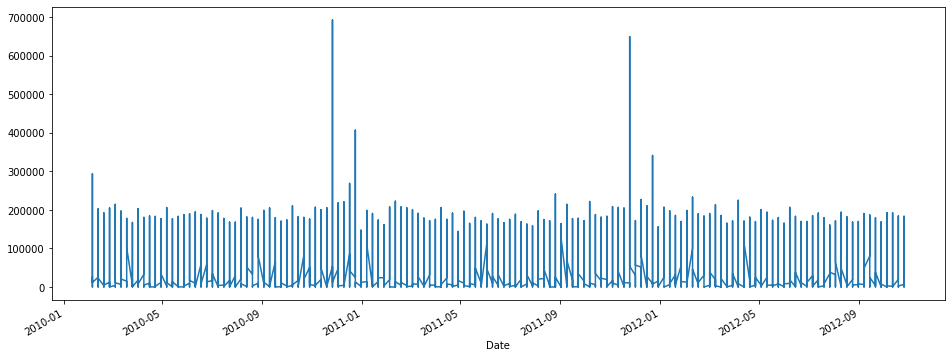

In [39]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()